 # Evaluation of clustering models
 
In this notebook, we will give examples of the following evaluation scores:
 
 * Adjusted Rand Index (ARI)
 * Silhouette Score
 
The first one is used when you have ground truth. The last for cases where you don't have ground truth. Let us first load the relevant modules:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import silhouette_score

We will again look at the generated Moon data example:

In [2]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

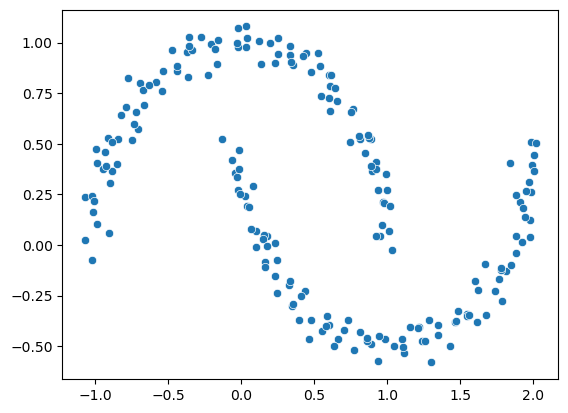

In [3]:
sns.scatterplot(x = X[:, 0], y = X[:, 1])
plt.show()

Note that this way of generating data, also generates y values even though we are doing unsupervised learning and traditionally do not have any ground truth. However, we can use y to compare a clustering to what we would desire in this case, i.e. two cases:

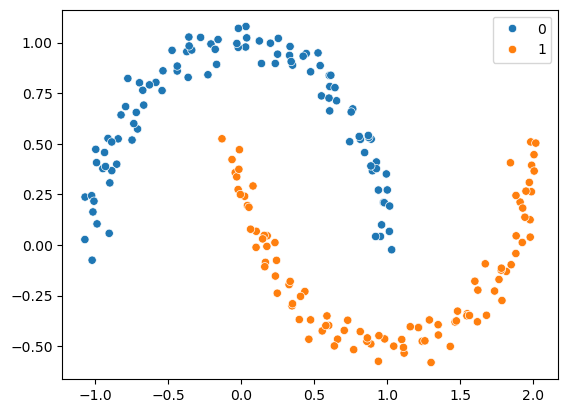

In [4]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.show()

Before we train different clustering algorithms and evaluate them, first standardize the data.

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

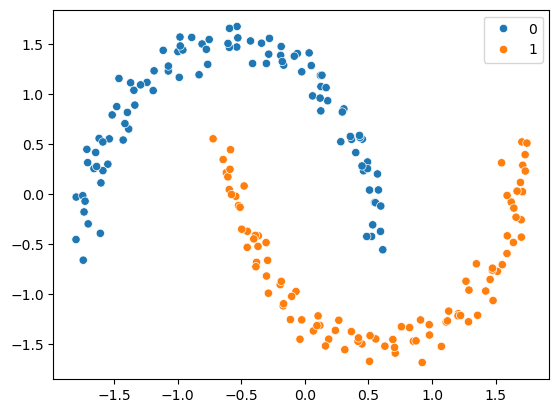

In [6]:
sns.scatterplot(x = X_scaled[:, 0], y = X_scaled[:, 1], hue = y)
plt.show()

Let us train the three different clustering algorithms on the data:

In [7]:
kmeanModel = KMeans(n_clusters=2)
clusters_KMeans = kmeanModel.fit_predict(X_scaled)
aggClust = AgglomerativeClustering(n_clusters=2)
clusters_aggClust = aggClust.fit_predict(X_scaled)
dbscan = DBSCAN()
clusters_DBSCAN = dbscan.fit_predict(X_scaled) 

C:\Users\Bruger\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For visualization purposes, let us put it all into a dataframe.

In [8]:
visData = pd.DataFrame({"X1": X_scaled[:, 0], "X2": X_scaled[:, 1]})
visData["GroundTruth"] = y
visData["KMeans"] = clusters_KMeans
visData["Agglomerative"] = clusters_aggClust
visData["DBSCAN"] = clusters_DBSCAN

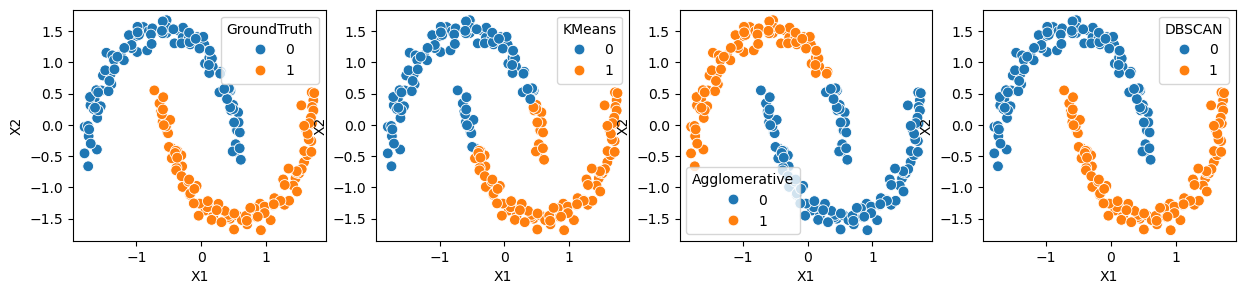

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3))
sns.scatterplot(data = visData, x = "X1", y = "X2", hue = "GroundTruth", s=60, ax=axes[0])
sns.scatterplot(data = visData, x = "X1", y = "X2", hue = "KMeans", s=60, ax=axes[1])
sns.scatterplot(data = visData, x = "X1", y = "X2", hue = "Agglomerative", s=60, ax=axes[2])
sns.scatterplot(data = visData, x = "X1", y = "X2", hue = "DBSCAN", s=60, ax=axes[3])
plt.show()

### Adjusted Rand Index 

Let's use the Adjusted Rand Index to compare the different clusterings to the ground truth.

In [10]:
ARI_df = pd.DataFrame({"Clustering method": ["KMeans", "Agglomerative", "DBSCAN", "KMeans"], 
                       "Comparative clustering method": ["GroundTruth", "GroundTruth", "GroundTruth", "Agglomerative"],
                       "Adjusted Rand Score": [adjusted_rand_score(visData["KMeans"], visData["GroundTruth"]),
                                               adjusted_rand_score(visData["Agglomerative"], visData["GroundTruth"]),
                                               adjusted_rand_score(visData["DBSCAN"], visData["GroundTruth"]),
                                               adjusted_rand_score(visData["KMeans"], visData["Agglomerative"])]})
ARI_df

,Clustering method,Comparative clustering method,Adjusted Rand Score
0,KMeans,GroundTruth,0.501596
1,Agglomerative,GroundTruth,0.606518
2,DBSCAN,GroundTruth,1.000000
3,KMeans,Agglomerative,0.622292


### Silhouette Score

Let's now use the Silhouette Score how good our different clusterings are.

In [11]:
SilScore_df = pd.DataFrame({"Clustering method": ["KMeans", "Agglomerative", "DBSCAN"], 
                       "Silhouette Score": [silhouette_score(X=X_scaled, labels=visData["KMeans"]),
                                            silhouette_score(X=X_scaled, labels=visData["Agglomerative"]),
                                            silhouette_score(X=X_scaled, labels=visData["DBSCAN"])]})
SilScore_df

,Clustering method,Silhouette Score
0,KMeans,0.493046
1,Agglomerative,0.457232
2,DBSCAN,0.382386


We see that DBSCAN does not get the best Silhouette score here, but that is because that Silhouette score is distance based, while the DBSCAN clustering is not completely distane based.

Finally, let us try to calculate the Silhouette score for different K's for KMeans clustering for the age-income data.

In [12]:
data = pd.read_csv("Ch5_age_income_data.csv")
X = data[['age', 'income']]
minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

FileNotFoundError: [Errno 2] No such file or directory: 'Ch5_age_income_data.csv'

In [ ]:
KMC_data = X_scaled_mm.copy()
for k in range(2,11):
    kmeanModel = KMeans(n_clusters=k)
    clusters = kmeanModel.fit_predict(X_scaled_mm)
    KMC_data["{0}_clusters".format(k)] = clusters
    sns.scatterplot(data = KMC_data, x = "age", y = "income", hue = "{0}_clusters".format(k), palette="deep")
    plt.title("{0}-Means clustering with Silhouette score {1}".format(k, silhouette_score(X=X_scaled_mm, labels = clusters)))
    plt.show()